Made by: 
Mathias,
Louise,
Thomas,
Tobias

# Business Case Description: Churning Customers

This case is based on a bank, which has many customers leaving their credit card services. 


## Problem

The business has a problem with more and more customers leaving their credit card services. 
They want to be able to predict which customers that are most likely to stop using the bank’s credit card services, in order to prevent customer churning. They will use the knowledge of risk of leaving to contact customers, give better service or in other ways do something to keep the customers from leaving.

## Dataset

The dataset can be found on kaggle with the URL:  https://www.kaggle.com/sakshigoyal7/credit-card-customers
The dataset provides data about customers, which includes both the current and churned customers. The data contains information about the customers age, gender and marital status, as well as their income, time with the bank and more.
The dataset has 21 columns and about 10.000 rows. Out of the 10.000 rows 84% are existing customers and the other 16% are attrited customers.
There was not need for any major clean up, as the variable types etc. already were compatible with R and our work with the data.
We did however delete two columns before starting the project, as these were insignificant to the dataset. This removal was stated on the Kaggle site of the dataset.

The reason, we imagine that the dataset can help with the bank’s problem, is because it can be analyzed to find patterns amongst the attrited customers. This can then potentially help the bank to give better service to current customers that are at risk of leaving the bank's credit card service, in order to try holding on to customers for longer.

## We cleaned we created we predicted 

With the information from the model the company is able to predict attriting customers, and be able to react accordingly. This could involve a personal call to customers the model is predicting to leave. As a business decision the bank might prioritize customers with a high income, since they would generate a bigger revenue for the bank. 


In [1]:
library("tidyverse")
library("ggplot2")
#install.packages("gmodels")

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [2]:
#Function that is used later to convert numbers to percents
percent <- function(x, digits = 2, format = "f", ...) {
  paste0(formatC(x * 100, format = format, digits = digits, ...), "%")
}

In [3]:
dataset = read.csv("BankChurners.csv")
dataset <- dataset[, -c(22:23)]

In [4]:
summary(dataset)

   CLIENTNUM                   Attrition_Flag  Customer_Age   Gender  
 Min.   :708082083   Attrited Customer:1627   Min.   :26.00   F:5358  
 1st Qu.:713036770   Existing Customer:8500   1st Qu.:41.00   M:4769  
 Median :717926358                            Median :46.00           
 Mean   :739177606                            Mean   :46.33           
 3rd Qu.:773143533                            3rd Qu.:52.00           
 Max.   :828343083                            Max.   :73.00           
                                                                      
 Dependent_count      Education_Level  Marital_Status       Income_Category
 Min.   :0.000   College      :1013   Divorced: 748   $120K +       : 727  
 1st Qu.:1.000   Doctorate    : 451   Married :4687   $40K - $60K   :1790  
 Median :2.000   Graduate     :3128   Single  :3943   $60K - $80K   :1402  
 Mean   :2.346   High School  :2013   Unknown : 749   $80K - $120K  :1535  
 3rd Qu.:3.000   Post-Graduate: 516                 

In [5]:
str(dataset)

'data.frame':	10127 obs. of  21 variables:
 $ CLIENTNUM               : int  768805383 818770008 713982108 769911858 709106358 713061558 810347208 818906208 710930508 719661558 ...
 $ Attrition_Flag          : Factor w/ 2 levels "Attrited Customer",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ Customer_Age            : int  45 49 51 40 40 44 51 32 37 48 ...
 $ Gender                  : Factor w/ 2 levels "F","M": 2 1 2 1 2 2 2 2 2 2 ...
 $ Dependent_count         : int  3 5 3 4 3 2 4 0 3 2 ...
 $ Education_Level         : Factor w/ 7 levels "College","Doctorate",..: 4 3 3 4 6 3 7 4 6 3 ...
 $ Marital_Status          : Factor w/ 4 levels "Divorced","Married",..: 2 3 2 4 2 2 2 4 3 3 ...
 $ Income_Category         : Factor w/ 6 levels "$120K +","$40K - $60K",..: 3 5 4 5 3 2 1 3 3 4 ...
 $ Card_Category           : Factor w/ 4 levels "Blue","Gold",..: 1 1 1 1 1 1 2 4 1 1 ...
 $ Months_on_book          : int  39 44 36 34 21 36 46 27 36 36 ...
 $ Total_Relationship_Count: int  5 6 4 3 5 3 6 2 5 6 ...
 $ Mo

# Here we display the distribution of customers who leaves depending on their education level

In [6]:
Attrition_Flag_education <- dataset %>%
count(Education_Level,Attrition_Flag)%>%
group_by(Education_Level)%>%
mutate(p=n/sum(n)*100)

attrited_only <- Attrition_Flag_education %>%
filter(Attrition_Flag == "Attrited Customer")

attrited_only

existing_only <- Attrition_Flag_education %>%
filter(Attrition_Flag == "Existing Customer")

existing_only

Education_Level,Attrition_Flag,n,p
College,Attrited Customer,154,15.20237
Doctorate,Attrited Customer,95,21.06430
Graduate,Attrited Customer,487,15.56905
High School,Attrited Customer,306,15.20119
Post-Graduate,Attrited Customer,92,17.82946
Uneducated,Attrited Customer,237,15.93813
Unknown,Attrited Customer,256,16.85319


Education_Level,Attrition_Flag,n,p
College,Existing Customer,859,84.79763
Doctorate,Existing Customer,356,78.93570
Graduate,Existing Customer,2641,84.43095
High School,Existing Customer,1707,84.79881
Post-Graduate,Existing Customer,424,82.17054
Uneducated,Existing Customer,1250,84.06187
Unknown,Existing Customer,1263,83.14681


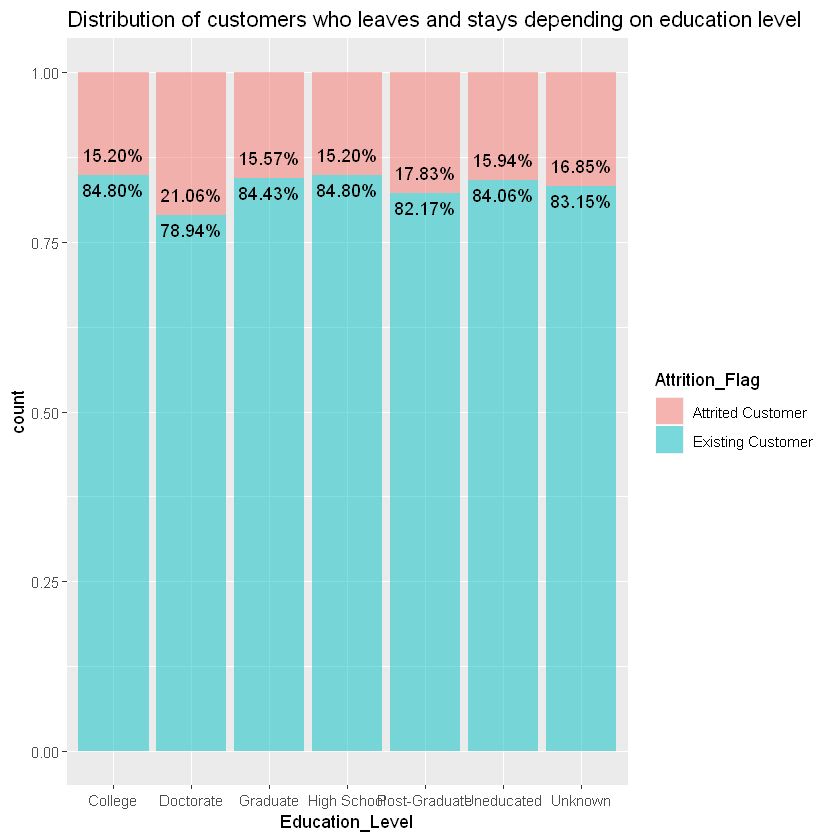

In [7]:
dataset %>%
ggplot(aes(x=Education_Level,fill=Attrition_Flag))+
geom_bar(alpha=0.5,position = "fill")+
geom_text(aes(label= percent((100-p)/100),x =Education_Level, y = (100-p)/100), data = attrited_only,
vjust = 1.5)+
geom_text(aes(label= percent((100-p)/100),x =Education_Level, y = p/100), data = existing_only,
vjust = -1)+

ggtitle("Distribution of customers who leaves and stays depending on education level")

As we can see in the graph above, the distribution is mainly even amongst the different education levels except "Doctorate" which has a bit more attrited customers than the other education levels. The amount that the "Doctorate" stands out isn't much and it's not even possible to say that there is a correlation to be found. Together with post-graduate, which contains the seconds highest amount of attrited customers, these two are the ones with the lowest amounts of samples in the dataset which could make the data less precise.


In [8]:
#Attempt at cleaner code from above graph. Doesn't work wtih correct percent (p) yet
dataset %>%
select(Education_Level,Attrition_Flag)%>%
add_count(Education_Level,Attrition_Flag)%>%
group_by(Education_Level,Attrition_Flag)%>%
mutate(p=n/sum(n)*100)



Education_Level,Attrition_Flag,n,p
High School,Existing Customer,1707,0.05858231
Graduate,Existing Customer,2641,0.03786445
Graduate,Existing Customer,2641,0.03786445
High School,Existing Customer,1707,0.05858231
Uneducated,Existing Customer,1250,0.08000000
Graduate,Existing Customer,2641,0.03786445
Unknown,Existing Customer,1263,0.07917656
High School,Existing Customer,1707,0.05858231
Uneducated,Existing Customer,1250,0.08000000
Graduate,Existing Customer,2641,0.03786445


# The Distribution of customers leaving and the amount of inactive months

In [9]:
Attrition_Flag_And_Inactive <- select(dataset, Attrition_Flag, Months_Inactive_12_mon)

In [10]:
Attrition_Flag_And_Inactive <- dataset %>%
count(Attrition_Flag, Months_Inactive_12_mon)%>%
group_by(Months_Inactive_12_mon) %>%
mutate(p=n/sum(n))

Attrition_Flag_Attrited <- Attrition_Flag_And_Inactive %>%
filter(Attrition_Flag == "Attrited Customer")

Attrition_Flag_Existing <- Attrition_Flag_And_Inactive %>%
filter(Attrition_Flag == "Existing Customer")

Attrition_Flag_And_Months_Inactive = merge(x=Attrition_Flag_Attrited,y=Attrition_Flag_Existing,by="Months_Inactive_12_mon")

better_Attrition_Flag_And_Months_Inactive <- Attrition_Flag_And_Months_Inactive %>%
select(Months_Inactive_12_mon, p.x, p.y)

names(better_Attrition_Flag_And_Months_Inactive)[2] <- "Stays"
names(better_Attrition_Flag_And_Months_Inactive)[3] <-"Leaves"

In [11]:
better_Attrition_Flag_And_Months_Inactive

Months_Inactive_12_mon,Stays,Leaves
0,0.5172414,0.4827586
1,0.0447828,0.9552172
2,0.1538696,0.8461304
3,0.2147686,0.7852314
4,0.2988506,0.7011494
5,0.1797753,0.8202247
6,0.1532258,0.8467742


In [12]:
dataset %>%
count(Months_Inactive_12_mon)%>%
group_by(Months_Inactive_12_mon)

Months_Inactive_12_mon,n
0,29
1,2233
2,3282
3,3846
4,435
5,178
6,124


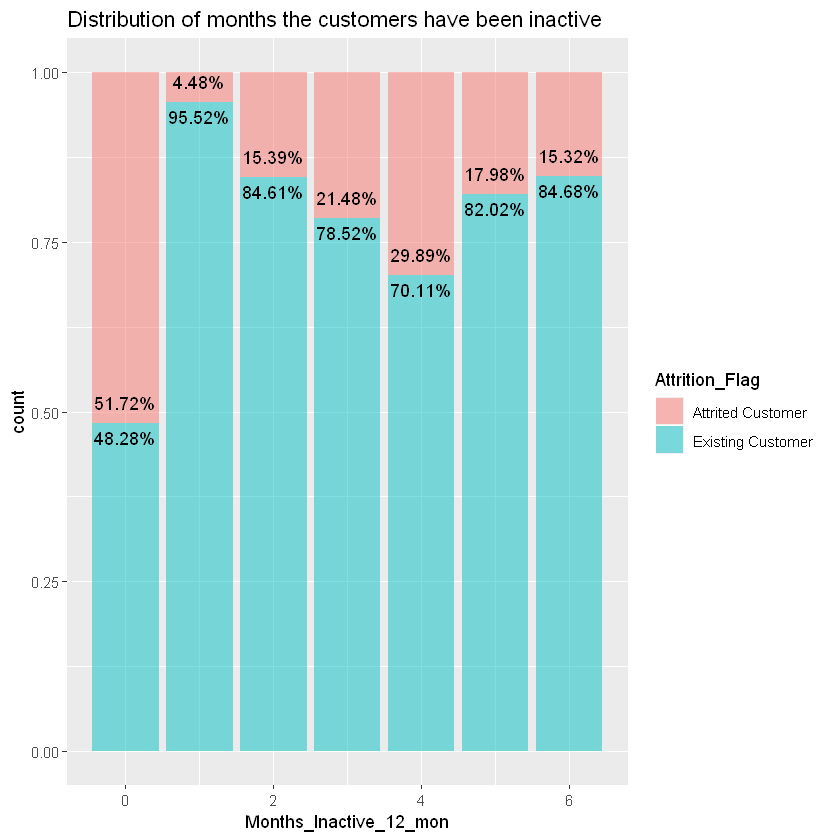

In [13]:
dataset %>%
ggplot()+
geom_bar(aes(x=Months_Inactive_12_mon,fill=Attrition_Flag), alpha=0.5,position = "fill")+
geom_text(aes(label= percent(Stays),x =Months_Inactive_12_mon, y = 1 -Stays), data = better_Attrition_Flag_And_Months_Inactive,
vjust = -1)+
geom_text(aes(label= percent(Leaves),x =Months_Inactive_12_mon, y = Leaves), data = better_Attrition_Flag_And_Months_Inactive,
vjust = 1.5)+
ggtitle("Distribution of months the customers have been inactive")

The graph above shows the distribution of months the customers have been inactive in the sense of not using their credit card. At first glance, it seems like 50% of the active customers are leaving. This is correct, but as shown above there is only 29 costumers in this category. We cannot conclude anything on this amount of data.

From 1 month to 4 months inactive, it does seem like costumers are more likely to leave, if they have been inactive longer. But this tendency also goes the other way from 4 months to 6 months.
This means that the bank should, theoretically, not be more concerned about customers, who have been inactive, compared to the active costumers.

# Gender distribution

In [14]:
df1 <-dataset %>%
filter(Attrition_Flag== "Attrited Customer"|Attrition_Flag== "Existing Customer")%>%
count(Attrition_Flag,Gender)%>%
group_by(Gender) %>%
mutate(total=sum(n)) %>%
mutate(p = (n/total))
df1$Gender_Distribution <- c("FA","MA","FE","ME")

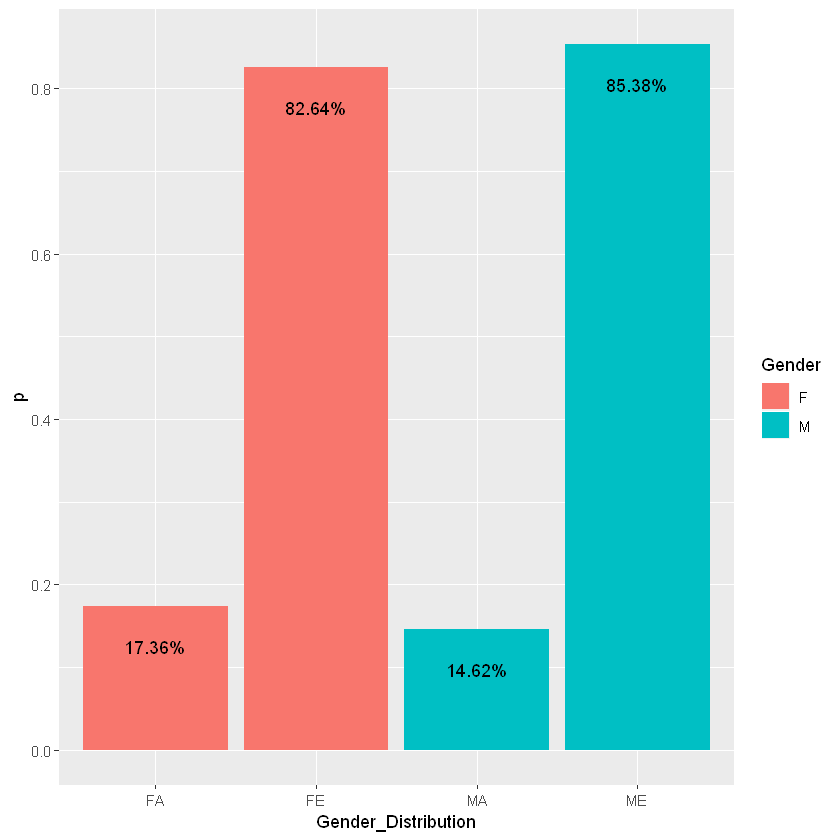

In [15]:
df1 %>% ggplot(aes(x = Gender_Distribution, y = p,fill = Gender)) +
geom_col()+
geom_text(aes(label = percent(p)), vjust =3.37 )

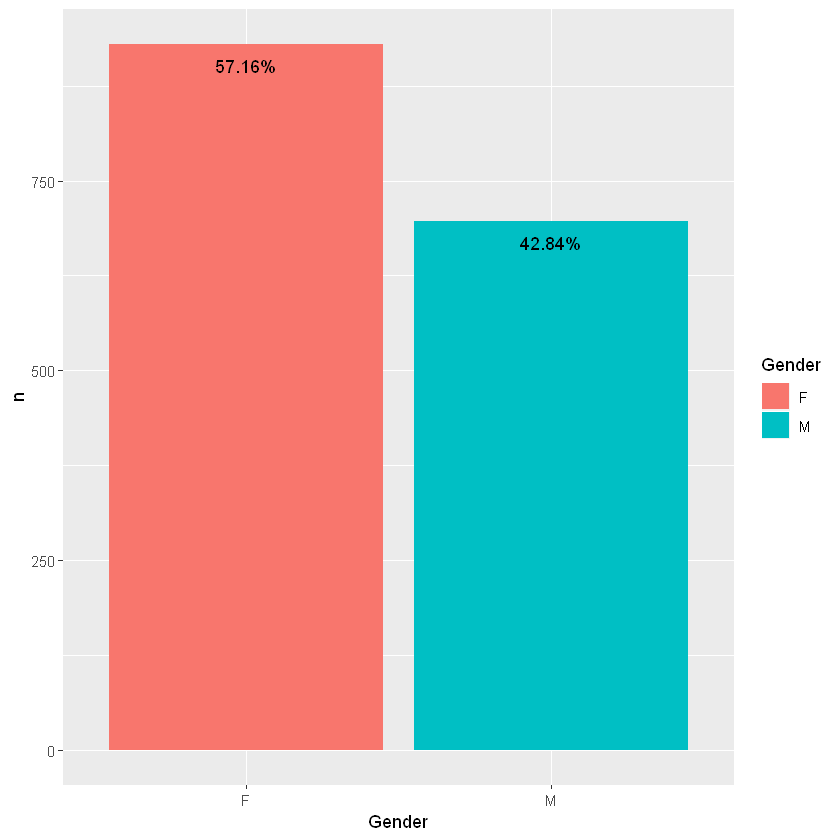

In [16]:
dataset %>%
filter(Attrition_Flag == "Attrited Customer") %>%
count(Gender) %>%
ggplot(aes(x = Gender, y = n,fill = Gender)) +
geom_col()+
geom_text(aes(label= percent((n/sum(n))),vjust=2))

The dataset consists of ~53% females and ~47% males. If we look at the above graph, we can see that the distribution between male and female is slighty different for the attrited costumers. 57.2% of the attrited costumers are female, which is (57.16%-52.9% = 4.26) 4.26% more than in the overall dataset.

This could point to a correlation between  costumers and their gender, but the difference is not big enough to confidently conclude this, without looking at a bigger dataset.

 # Attrited Customers by education level and income category


In [17]:
temp <- dataset %>%
filter(Attrition_Flag == "Attrited Customer") %>%
count(Education_Level,Attrition_Flag, Income_Category)%>%
group_by(Education_Level)

temp1 <-aggregate(n~Income_Category, temp,sum)

ahdf <- merge(temp, temp1, by = 'Income_Category') %>%
mutate(p=n.x/n.y*100)

temp2 <- dataset %>%
filter(Attrition_Flag == "Existing Customer") %>%
count(Education_Level,Attrition_Flag, Income_Category)%>%
group_by(Education_Level)

sum_by_income_category <-aggregate(n~Income_Category, temp2,sum)

ehdf <- merge(temp2, sum_by_income_category, by = 'Income_Category') %>%
mutate(p=n.x/n.y*100)


In [18]:
sum_by_income_category

Income_Category,n
$120K +,601
$40K - $60K,1519
$60K - $80K,1213
$80K - $120K,1293
Less than $40K,2949
Unknown,925


In [19]:
ehdf

Income_Category,Education_Level,Attrition_Flag,n.x,n.y,p
$120K +,College,Existing Customer,58,601,9.650582
$120K +,High School,Existing Customer,119,601,19.800333
$120K +,Doctorate,Existing Customer,29,601,4.825291
$120K +,Post-Graduate,Existing Customer,26,601,4.326123
$120K +,Uneducated,Existing Customer,96,601,15.973378
$120K +,Unknown,Existing Customer,101,601,16.805324
$120K +,Graduate,Existing Customer,172,601,28.618968
$40K - $60K,College,Existing Customer,159,1519,10.467413
$40K - $60K,Doctorate,Existing Customer,59,1519,3.884134
$40K - $60K,Graduate,Existing Customer,476,1519,31.336406


## Heatmaps for income category and education level

### Heatmap of the existing customers

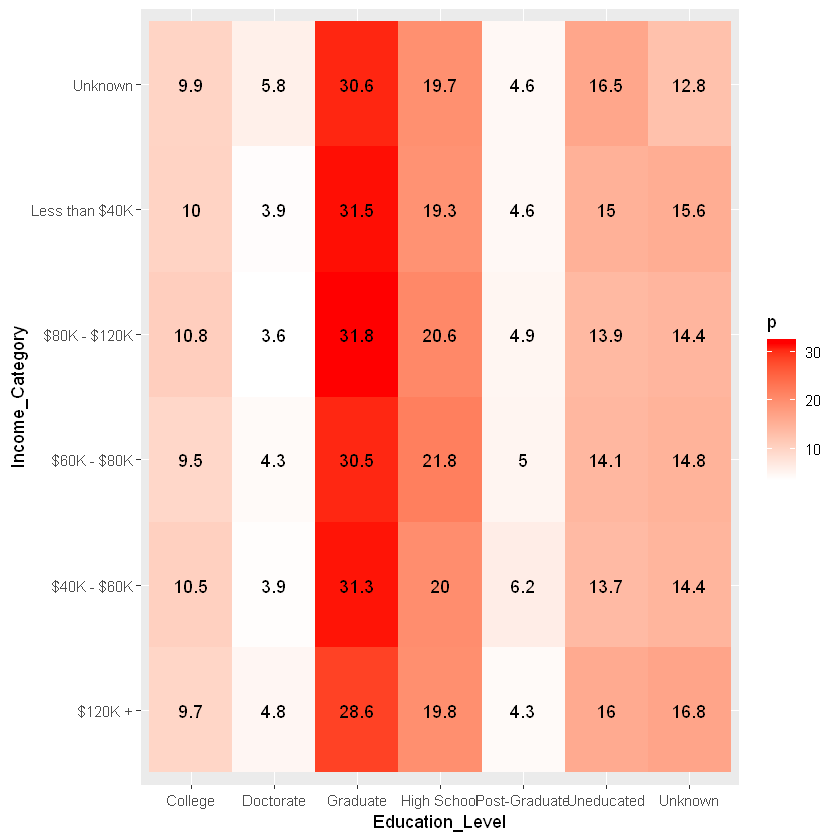

In [20]:
ggplot(ehdf, aes(x = Education_Level, y = Income_Category, fill = p)) +
  geom_tile() +
geom_text(aes(label = round(p, 1))) +
scale_fill_gradient(low = "white", high = "red") 

### Heatmap of the attrited customers

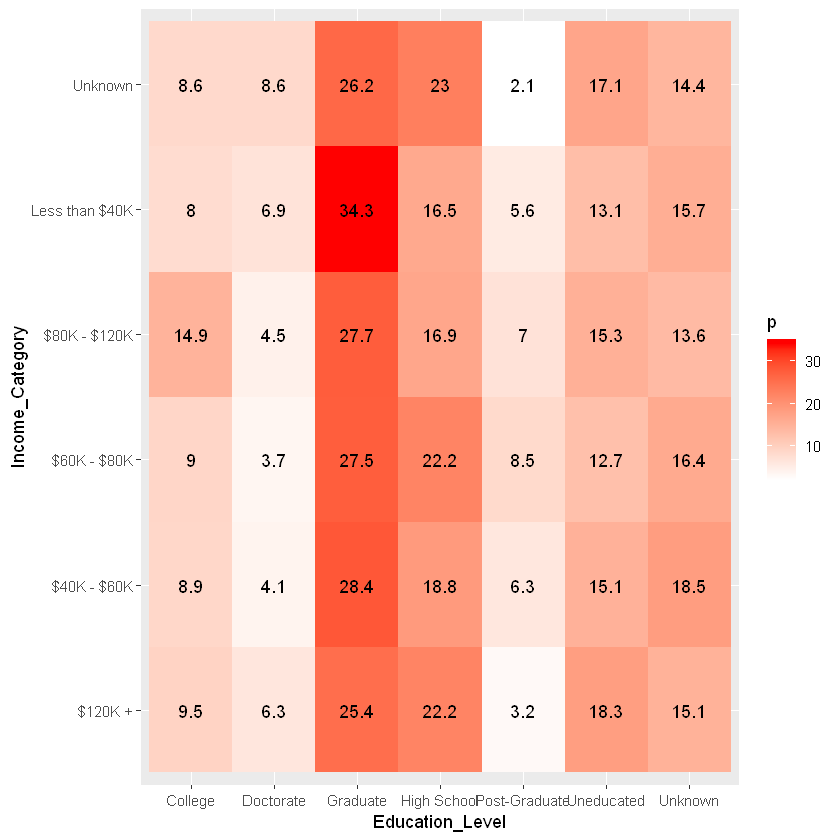

In [21]:
ggplot(ahdf, aes(x = Education_Level, y = Income_Category, fill = p)) +
  geom_tile() +
geom_text(aes(label = round(p, 1))) +
scale_fill_gradient(low = "white", high = "red") 

We can see in the two heatmaps above that there is no obvious correlation between the customers' education level and income level regarding their attrition flag.

# Credit limit for customers

## Calculating the mean value of the credit limit for the two customers groups (existing and attrited)

In [22]:
#mean value of credit limit for existing customers and attrited customers
mean(dataset[dataset$Attrition_Flag == 'Existing Customer','Credit_Limit'])
mean(dataset[dataset$Attrition_Flag == 'Attrited Customer','Credit_Limit'])

[1] 8726.878

[1] 8136.039

## Boxplot for credit limit

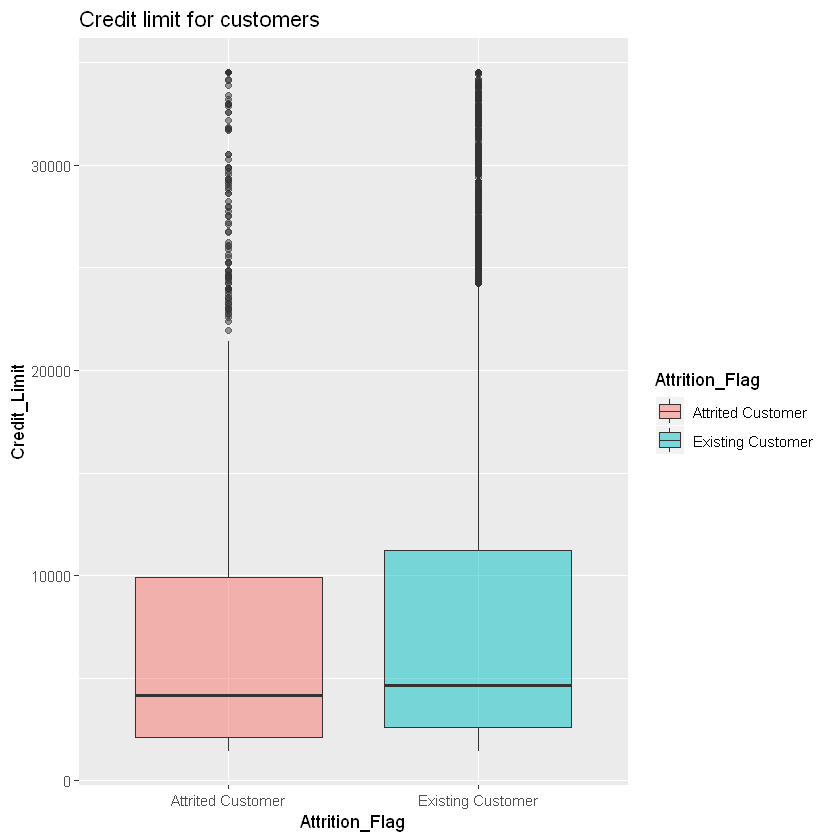

In [23]:
dataset%>%
#filter(Attrition_Flag)%>%
#ggplot(aes(x=Attrition_Flag,y=Credit_Limit,col=Attrition_Flag))+
ggplot(aes(x=Attrition_Flag,y=Credit_Limit,fill=Attrition_Flag))+
geom_boxplot(alpha=0.5)+
ggtitle("Credit limit for customers")


We wanted to see if there was a correlation between the attrited customers and their credit limit.
In the graph above we can see a small difference between the attrited customers and existing customers, which shows the attrited customers have a tendency to have a lower credit limit.

This difference is worth noting, alongside the different mean values for the two customer groups

## Correlation between credit limit and months inactive

In [24]:
cor.test(dataset$Credit_Limit, dataset$Months_Inactive_12_mon)
###
###
###
######
######
######
######
######
######
######
######
######
######
###


	Pearson's product-moment correlation

data:  dataset$Credit_Limit and dataset$Months_Inactive_12_mon
t = -2.0525, df = 10125, p-value = 0.04015
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.0398547382 -0.0009173786
sample estimates:
        cor 
-0.02039379 


# Marital status

## Distribution of marital status

In [25]:
martial_procent <- dataset %>%
filter(Attrition_Flag== "Attrited Customer"|Attrition_Flag== "Existing Customer")%>%
count(Attrition_Flag,Marital_Status)%>%
group_by(Marital_Status) %>%
mutate(total=sum(n)) %>%
mutate(p = (n/total))
#A = attrited E = existing
martial_procent$Marital_Distribution <- c("AD","AM","AS","AU","ED","EM","ES","EU")

In [26]:
martial_procent

Attrition_Flag,Marital_Status,n,total,p,Marital_Distribution
Attrited Customer,Divorced,121,748,0.1617647,AD
Attrited Customer,Married,709,4687,0.1512695,AM
Attrited Customer,Single,668,3943,0.1694142,AS
Attrited Customer,Unknown,129,749,0.1722296,AU
Existing Customer,Divorced,627,748,0.8382353,ED
Existing Customer,Married,3978,4687,0.8487305,EM
Existing Customer,Single,3275,3943,0.8305858,ES
Existing Customer,Unknown,620,749,0.8277704,EU


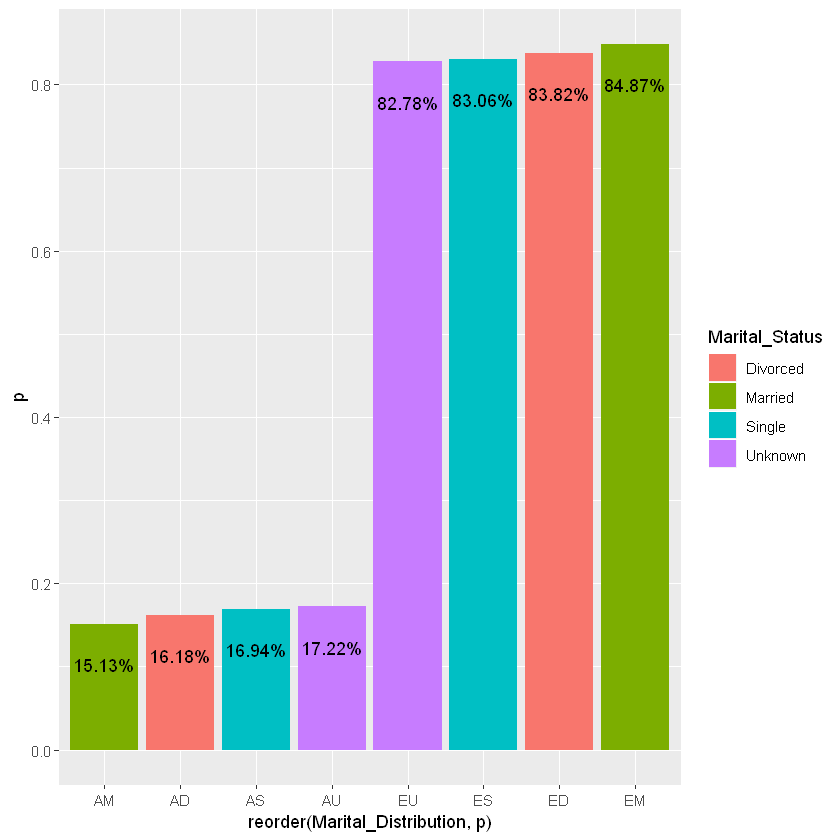

In [27]:
martial_procent %>% ggplot(aes(reorder(Marital_Distribution, p), y = p, fill = Marital_Status)) +
geom_col()+
geom_text(aes(label = percent(p)), vjust =3.37 )

We wanted to see if there was any correlation between the attrited flags and their marital status. We suspected that there could be a higher attrited % for the married customers, because we expected married couples to maybe share a creditcard service and would discontinue it in case of divorce. However, there does not seem do be any correlation between the marital status and the attrition flag, other than a marginal difference in the married customers.

# MODEL (Decision tree)

In [28]:
set.seed(1234)
df_rand <- dataset[order(runif(10127)), ]

### Confirming that we did randomise the order in the dataframe without changing any of the data.

In [29]:
summary(dataset$Customer_Age)
summary(df_rand$Customer_Age)

head(dataset$Customer_Age)
head(df_rand$Customer_Age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  26.00   41.00   46.00   46.33   52.00   73.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  26.00   41.00   46.00   46.33   52.00   73.00 

[1] 45 49 51 40 40 44

[1] 42 41 56 42 49 50

In [30]:
df_train <- df_rand[1:9000, ]
df_test <- df_rand[9001:10127, ]

### Confirming we did infact split the dataframe into two equally representive parts

In [31]:
prop.table(table(df_train$Attrition_Flag))
prop.table(table(df_test$Attrition_Flag))


Attrited Customer Existing Customer 
        0.1607778         0.8392222 


Attrited Customer Existing Customer 
        0.1597161         0.8402839 

## Making a dicision tree

In [32]:
#install.packages("C50")
library(C50)

Warning message:
"package 'C50' was built under R version 3.6.3"

In [33]:
df_model <- C5.0(df_train[-2], df_train$Attrition_Flag)

In [34]:
df_model


Call:
C5.0.default(x = df_train[-2], y = df_train$Attrition_Flag)

Classification Tree
Number of samples: 9000 
Number of predictors: 20 

Tree size: 126 

Non-standard options: attempt to group attributes


Below we see the decision tree, and which attributes are used the most in its calculation. We also wanted to see the accuracy of the model.

In [35]:
summary(df_model)


Call:
C5.0.default(x = df_train[-2], y = df_train$Attrition_Flag)


C5.0 [Release 2.07 GPL Edition]  	Sun May 01 18:07:00 2022
-------------------------------

Class specified by attribute `outcome'

Read 9000 cases (21 attributes) from undefined.data

Decision tree:

Total_Ct_Chng_Q4_Q1 <= 0.5:
:...Total_Trans_Ct > 56:
:   :...Total_Amt_Chng_Q4_Q1 <= 0.889: Existing Customer (188/3)
:   :   Total_Amt_Chng_Q4_Q1 > 0.889:
:   :   :...Total_Trans_Amt <= 4484: Existing Customer (15)
:   :       Total_Trans_Amt > 4484:
:   :       :...Avg_Utilization_Ratio <= 0.454: Attrited Customer (12/1)
:   :           Avg_Utilization_Ratio > 0.454: Existing Customer (4)
:   Total_Trans_Ct <= 56:
:   :...Total_Relationship_Count <= 2: Attrited Customer (223/6)
:       Total_Relationship_Count > 2:
:       :...Total_Revolving_Bal <= 609:
:           :...Months_Inactive_12_mon <= 1:
:           :   :...Months_Inactive_12_mon <= 0: Attrited Customer (4)
:           :   :   Months_Inactive_12_mon > 0:
:  

## Evaluate the DT

In [36]:
df_pred <- predict(df_model, df_test)

In [37]:
library(gmodels)
CrossTable(df_test$Attrition_Flag, df_pred,
           prop.chisq = FALSE, #prop.c = FALSE, prop.r = FALSE,
           dnn = c('actual Attrition', 'predicted Attrition'))

Warning message:
"package 'gmodels' was built under R version 3.6.3"


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  1127 

 
                  | predicted Attrition 
 actual Attrition | Attrited Customer | Existing Customer |         Row Total | 
------------------|-------------------|-------------------|-------------------|
Attrited Customer |               153 |                27 |               180 | 
                  |             0.850 |             0.150 |             0.160 | 
                  |             0.850 |             0.029 |                   | 
                  |             0.136 |             0.024 |                   | 
------------------|-------------------|-------------------|-------------------|
Existing Customer |                27 |               920 |               947 | 
                  |             0.029 |             0.971 |             0.840 | 
  

## Improving the model performance

In [38]:
df_boost10 <- C5.0(df_train[-2], df_train$Attrition_Flag, trials = 10)

In [39]:
df_boost10


Call:
C5.0.default(x = df_train[-2], y = df_train$Attrition_Flag, trials = 10)

Classification Tree
Number of samples: 9000 
Number of predictors: 20 

Number of boosting iterations: 10 
Average tree size: 95.4 

Non-standard options: attempt to group attributes


In [40]:
summary(df_boost10)


Call:
C5.0.default(x = df_train[-2], y = df_train$Attrition_Flag, trials = 10)


C5.0 [Release 2.07 GPL Edition]  	Sun May 01 18:07:01 2022
-------------------------------

Class specified by attribute `outcome'

Read 9000 cases (21 attributes) from undefined.data

-----  Trial 0:  -----

Decision tree:

Total_Ct_Chng_Q4_Q1 <= 0.5:
:...Total_Trans_Ct > 56:
:   :...Total_Amt_Chng_Q4_Q1 <= 0.889: Existing Customer (188/3)
:   :   Total_Amt_Chng_Q4_Q1 > 0.889:
:   :   :...Total_Trans_Amt <= 4484: Existing Customer (15)
:   :       Total_Trans_Amt > 4484:
:   :       :...Avg_Utilization_Ratio <= 0.454: Attrited Customer (12/1)
:   :           Avg_Utilization_Ratio > 0.454: Existing Customer (4)
:   Total_Trans_Ct <= 56:
:   :...Total_Relationship_Count <= 2: Attrited Customer (223/6)
:       Total_Relationship_Count > 2:
:       :...Total_Revolving_Bal <= 609:
:           :...Months_Inactive_12_mon <= 1:
:           :   :...Months_Inactive_12_mon <= 0: Attrited Customer (4)
:           : 

In [41]:
df_boost_pred10 <- predict(df_boost10, df_test)
CrossTable(df_test$Attrition_Flag, df_boost_pred10,
           prop.chisq = FALSE, prop.c = FALSE, prop.r = FALSE,
           
           dnn = c('actual Attrition', 'predicted Attrition'))


 
   Cell Contents
|-------------------------|
|                       N |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  1127 

 
                  | predicted Attrition 
 actual Attrition | Attrited Customer | Existing Customer |         Row Total | 
------------------|-------------------|-------------------|-------------------|
Attrited Customer |               148 |                32 |               180 | 
                  |             0.131 |             0.028 |                   | 
------------------|-------------------|-------------------|-------------------|
Existing Customer |                11 |               936 |               947 | 
                  |             0.010 |             0.831 |                   | 
------------------|-------------------|-------------------|-------------------|
     Column Total |               159 |               968 |              1127 | 
------------------|-------------------|-------------------|

## We made a random forest to see if the result would be any better than with just a single decision tree.

In [42]:
library(randomForest)
set.seed(300)
df_rf <- randomForest(df_train[-2], df_train$Attrition_Flag)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:dplyr':

    combine

The following object is masked from 'package:ggplot2':

    margin



In [43]:
df_rf


Call:
 randomForest(x = df_train[-2], y = df_train$Attrition_Flag) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 4

        OOB estimate of  error rate: 3.77%
Confusion matrix:
                  Attrited Customer Existing Customer class.error
Attrited Customer              1199               248  0.17138908
Existing Customer                91              7462  0.01204819

In [44]:
df_rf_pred <- predict(df_rf, df_test)

In [45]:
CrossTable(df_test$Attrition_Flag, df_rf_pred,
           prop.chisq = FALSE, prop.c = FALSE, prop.r = FALSE,
           dnn = c('actual Attrition', 'predicted Attrition'))


 
   Cell Contents
|-------------------------|
|                       N |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  1127 

 
                  | predicted Attrition 
 actual Attrition | Attrited Customer | Existing Customer |         Row Total | 
------------------|-------------------|-------------------|-------------------|
Attrited Customer |               146 |                34 |               180 | 
                  |             0.130 |             0.030 |                   | 
------------------|-------------------|-------------------|-------------------|
Existing Customer |                 8 |               939 |               947 | 
                  |             0.007 |             0.833 |                   | 
------------------|-------------------|-------------------|-------------------|
     Column Total |               154 |               973 |              1127 | 
------------------|-------------------|-------------------|

truePositive == 83% + 13% = 96% accuracy.

# Evaluating model

Firstly, we made the criteria that the model should have an accuracy at 50% or more to be better than simply guessing whether a customer will be leaving the credit card service in the near future or not. This is based on the fact that the model is binary classification, meaning there are only two options for the customers, staying or leaving.
However, we did change this criteria to try reaching for more than 84% accuracy, as this is approximately the accuracy reached when all customers are predicted to be staying.

The first model (a single decision tree) had an accuracy of 95%. We conclude that this accuracy is good, since its higher than 84%.

The next model (A random forest) had an accuracy of 96%. This is a little better than the single decision tree. 96% (and 95%) is a very high accuracy, and we also suspected the model could have learned to just place all the customers in the existing (staying) category. As the dataset is unbalanced (only 16% of the customers have attrited) the model could get an accuracy of 84%, by simply saying all the customers are staying.

However, the accuracy is higher than 84% and we can see only 34 of the attriting customers are predicted to be existing. So the model placed 146 out of the 180 attriting customers from the test data in the right category.

Based on this we conclude that the model is acceptable and could potentially be used by the bank. Currently, the only argument for not using the model would be that the dataset is relatively small and the evaluation/test was only done on 1127 samples.


# Reflections

The dataset also only contained around 10.000 rows, which we decided to split into 9000 samples for training and a little over 1000 for testing. This is a reasonable amount but it could be much better.
Our dataset is quite unbalanced when we are looking at the amount of data for existing and attrited customers. 84% of the data is existing customers while the remainder is attrited customers. This could potentially ruin our chance for getting a legitimate prediction because the dataset is so small the amount of attrited attributes is lacking.



## Personal information and GDPR

The dataset includes some personal information, such as marital status, education level, gender and age. Moreover, it could be argued that banking information (credit limit etc.) could also be classified as personal information.
The data is not unique to the specific customer and they are not identifiable based on the information from the dataset. The model does not use names, social security numbers or IDs. The bank is storing the personal information, but that is unavoidable in a bank as the information is crucial for their services.


## Ethics

You can make a point of saying that since a model is able to predict a customer's future (in theory), it's not completely unethical. But, as we pointed out beforehand, the data we use can not be used to define a specific person, and therefore we think it is ethical. 
With that said, we currently cannot rule out any potential bias (ex. regarding gender, education level etc.). It could be tested, but we tried normalizing the dataset to not give more/less value to certain categories or values (ex. avoiding males represented by the value 1 and females the value 0)


## False positives and false negatives

False positives and false negatives
When looking at our final model the amount of false negatives (predicting attrited customers to be existing) is higher than the amount of false positives (existing customers being predicted have attrited).
It can be interesting to think about the cost of acting (or not acting) on these cases. If a customer is predicted to be at risk of leaving (but might not have left) the bank uses unnecessary resources in this customer. How much this will end up costing the bank is depending on the number of false positives and what the bank is going to do to hold onto the customers. If they give a money bonus to bribe the customers to stay, it can be expensive, but we do not imagine this would be the case.
In the case of false negatives, it could be argued that this will cost the bank more. If the bank does not act on customers wanting to leave, lose the customer. 
Our interpretation is that it costs the bank more to not act on customers leaving, than it is to act on customers that would not leave anyway.
Therefore, we conclude that it is not a good thing that the percent of false negatives is higher than the percent of false positives (regarding attriting customers).
